<a href="https://colab.research.google.com/github/iwsmimsantos/Benedito-git/blob/main/C%C3%B3pia_de_spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#1. Importando Bibliotecas Necessárias




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Carregamento e Exploração de Dados

In [2]:
# Carregar os datasets
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

# Verificar primeiras linhas do dataset
print(train_df.head())
print(train_df.info())
print(train_df.describe())

   track_unique_id                track_id            artists  \
0            41996  7hUhmkALyQ8SX9mJs5XI3D   Love and Rockets   
1            76471  5x59U89ZnjZXuNAAlc8X1u   Filippa Giordano   
2            54809  70Vng5jLzoJLmeLu3ayBQq      Susumu Yokota   
3            16326  1cRfzLJapgtwJ61xszs37b  Franz Liszt;YUNDI   
4           109799  47d5lYjbiMy0EdMRV8lRou            Scooter   

             album_name                              track_name  duration_ms  \
0      Love and Rockets                              Motorcycle       211533   
1      Filippa Giordano  Addio del passato - From "La traviata"       196000   
2                Symbol                      Purple Rose Minuet       216506   
3  Relajación y siestas            Liebeslied (Widmung), S. 566       218346   
4       Scooter Forever                            The Darkside       173160   

   explicit  danceability  energy  key  ...  mode  speechiness  acousticness  \
0     False         0.305  0.8490    9  ...     

## 3. Limpeza Tratamento de Valores Nulos / Codificação de Variáveis Categóricas

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# Leitura dos dados
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 1. Limpeza e Tratamento de Valores Nulos

# Verificar valores nulos no dataset de treino
print(train.isnull().sum())

# Excluindo colunas irrelevantes para o modelo preditivo
train.drop(columns=['track_id', 'album_name', 'track_name'], inplace=True)
test.drop(columns=['track_id', 'album_name', 'track_name'], inplace=True)

# Preencher valores nulos nas variáveis numéricas com a mediana
num_cols = ['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
imputer_num = SimpleImputer(strategy='median')

train[num_cols] = imputer_num.fit_transform(train[num_cols])
test[num_cols] = imputer_num.transform(test[num_cols])

# Preencher valores nulos em variáveis categóricas com a moda
cat_cols = ['artists', 'track_genre']
imputer_cat = SimpleImputer(strategy='most_frequent')

train[cat_cols] = imputer_cat.fit_transform(train[cat_cols])
test[cat_cols] = imputer_cat.transform(test[cat_cols])

# 2. Codificação de Variáveis Categóricas

# Codificação da variável 'explicit' (booleano: 0 ou 1)
train['explicit'] = train['explicit'].astype(int)
test['explicit'] = test['explicit'].astype(int)

# Label Encoding para a variável 'mode' (0 para menor, 1 para maior)
le = LabelEncoder()
train['mode'] = le.fit_transform(train['mode'])
test['mode'] = le.transform(test['mode'])

# Codificação dos gêneros musicais ('track_genre') usando One-Hot Encoding
train = pd.get_dummies(train, columns=['track_genre'], drop_first=True)
test = pd.get_dummies(test, columns=['track_genre'], drop_first=True)

# Certificar que os datasets de treino e teste têm o mesmo número de colunas após One-Hot Encoding
train, test = train.align(test, join='left', axis=1, fill_value=0)

# Verificar se os valores ausentes foram tratados
print(train.isnull().sum())
print(test.isnull().sum())

# Conferir os dados após a codificação
print(train.head())

track_unique_id      0
track_id             0
artists              0
album_name           0
track_name           0
duration_ms          0
explicit             0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
track_genre          0
popularity_target    0
dtype: int64
track_unique_id            0
artists                    0
duration_ms                0
explicit                   0
danceability               0
                          ..
track_genre_techno         0
track_genre_trance         0
track_genre_trip-hop       0
track_genre_turkish        0
track_genre_world-music    0
Length: 130, dtype: int64
track_unique_id            0
artists                    0
duration_ms                0
explicit                   0
danceability               0
              

# 3. Exploração e Visualização dos Dados

In [4]:
# Configurações de estilo
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

Análise Estatística Descritiva:

In [5]:
# Exibir estatísticas descritivas das variáveis numéricas
print(train.describe())

# Contagem de variáveis categóricas
print(train['explicit'].value_counts())
print(train['mode'].value_counts())

       track_unique_id   duration_ms      explicit  danceability  \
count     79800.000000  7.980000e+04  79800.000000  79800.000000   
mean      57140.494048  2.279022e+05      0.085689      0.567318   
std       32993.196225  1.050599e+05      0.279906      0.173110   
min           0.000000  1.338600e+04      0.000000      0.000000   
25%       28450.500000  1.744360e+05      0.000000      0.456000   
50%       57234.000000  2.128130e+05      0.000000      0.581000   
75%       85774.250000  2.614260e+05      0.000000      0.695000   
max      113998.000000  5.237295e+06      1.000000      0.985000   

             energy           key      loudness          mode   speechiness  \
count  79800.000000  79800.000000  79800.000000  79800.000000  79800.000000   
mean       0.641529      5.307043     -8.263741      0.637732      0.084750   
std        0.251441      3.562186      5.035504      0.480659      0.105657   
min        0.000019      0.000000    -49.307000      0.000000      0.00

### Visualizações para Análise Exploratória

1. Distribuição das Variáveis Numéricas

A visualização das distribuições ajuda a identificar padrões ou outliers nas variáveis numéricas.

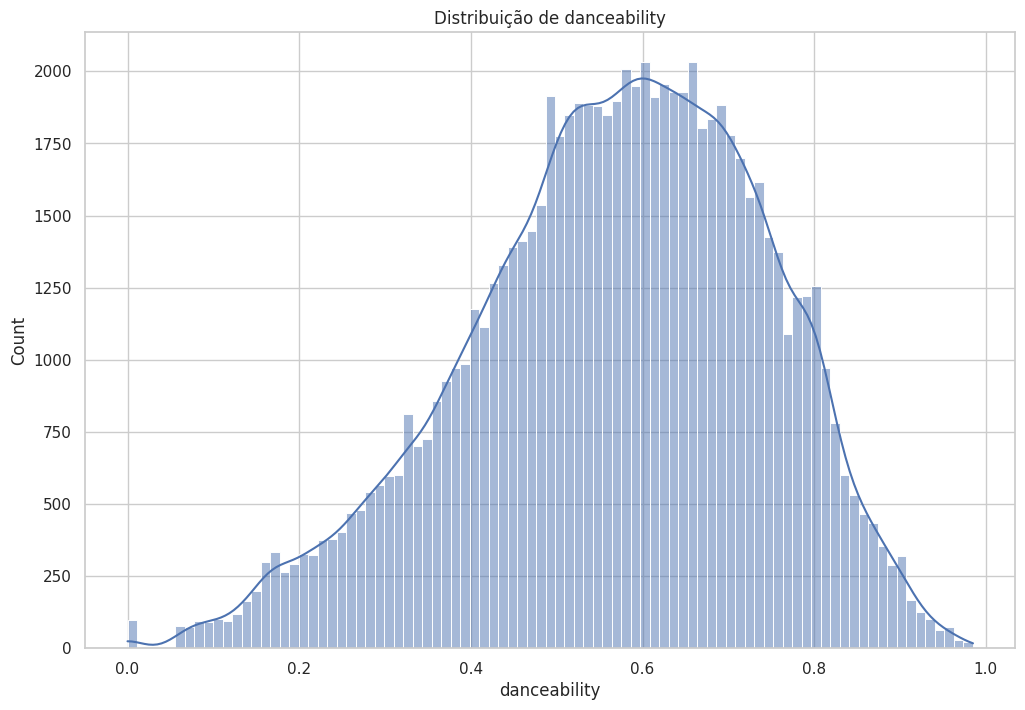

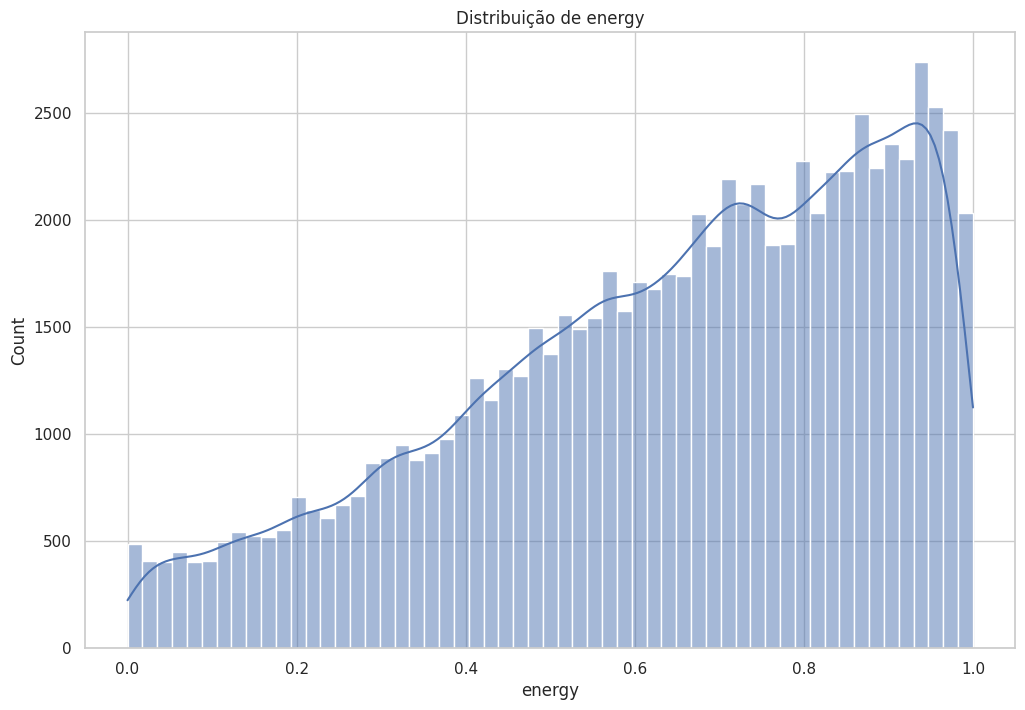

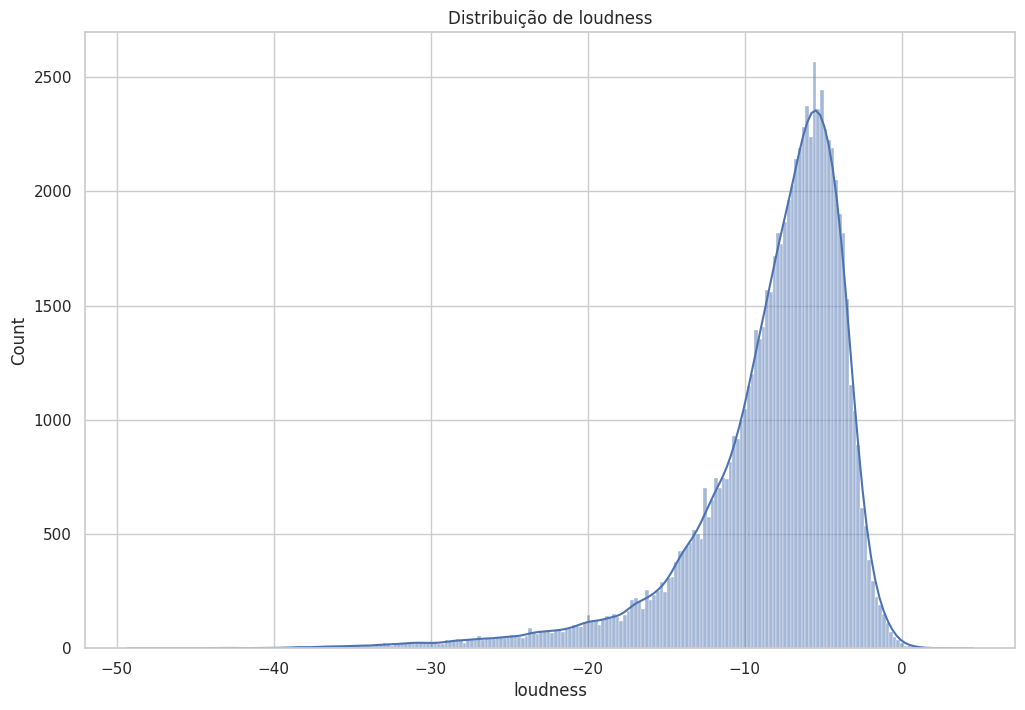

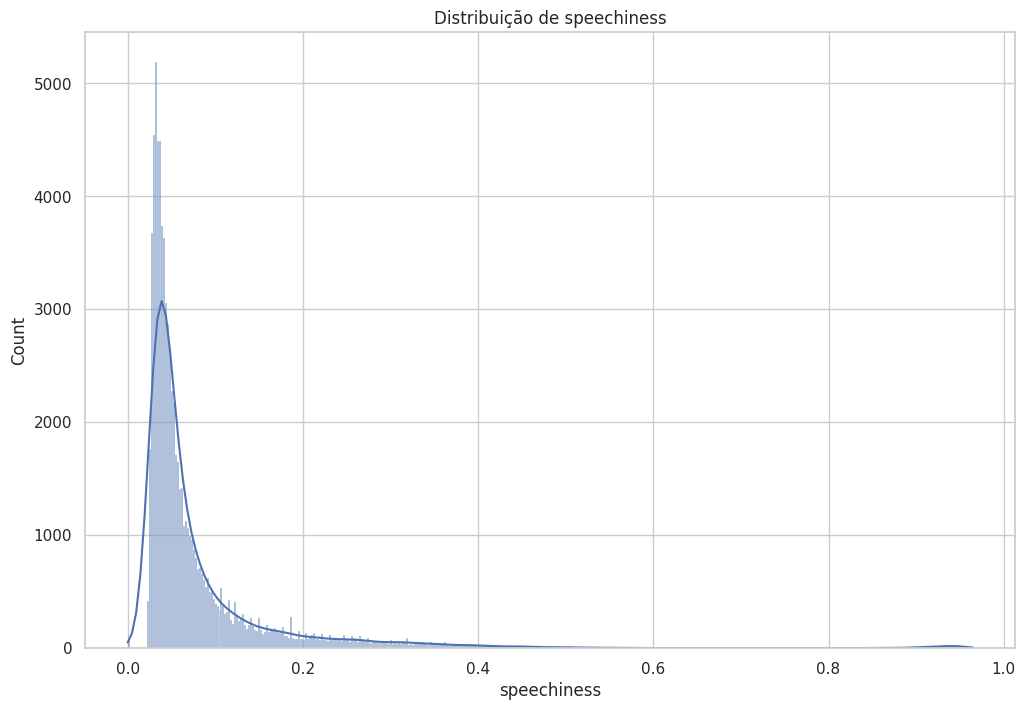

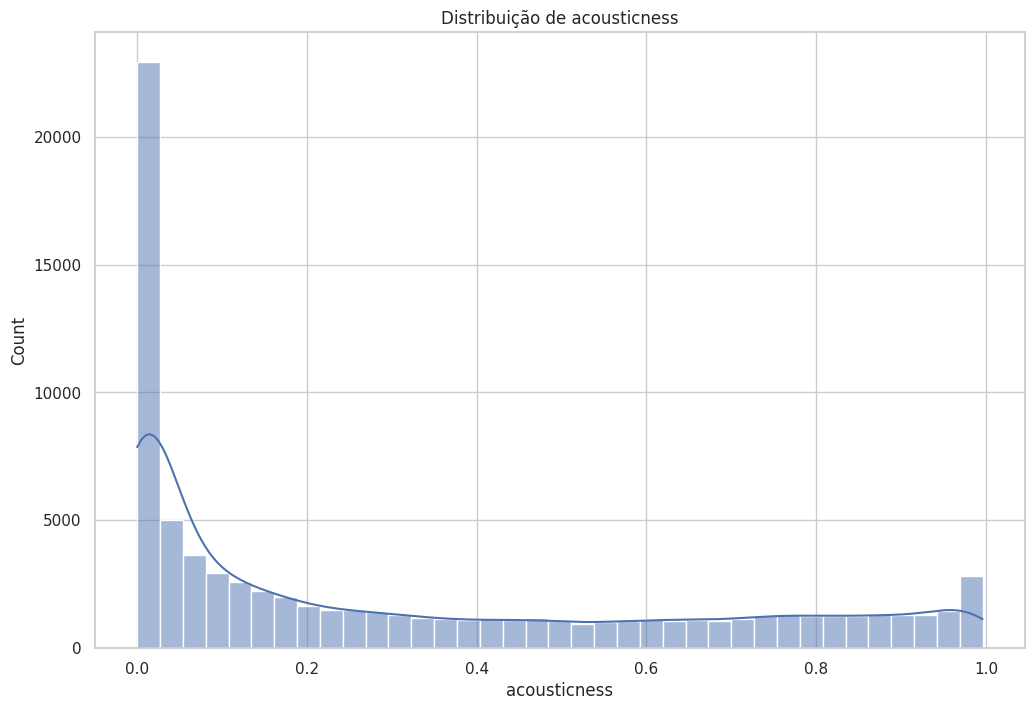

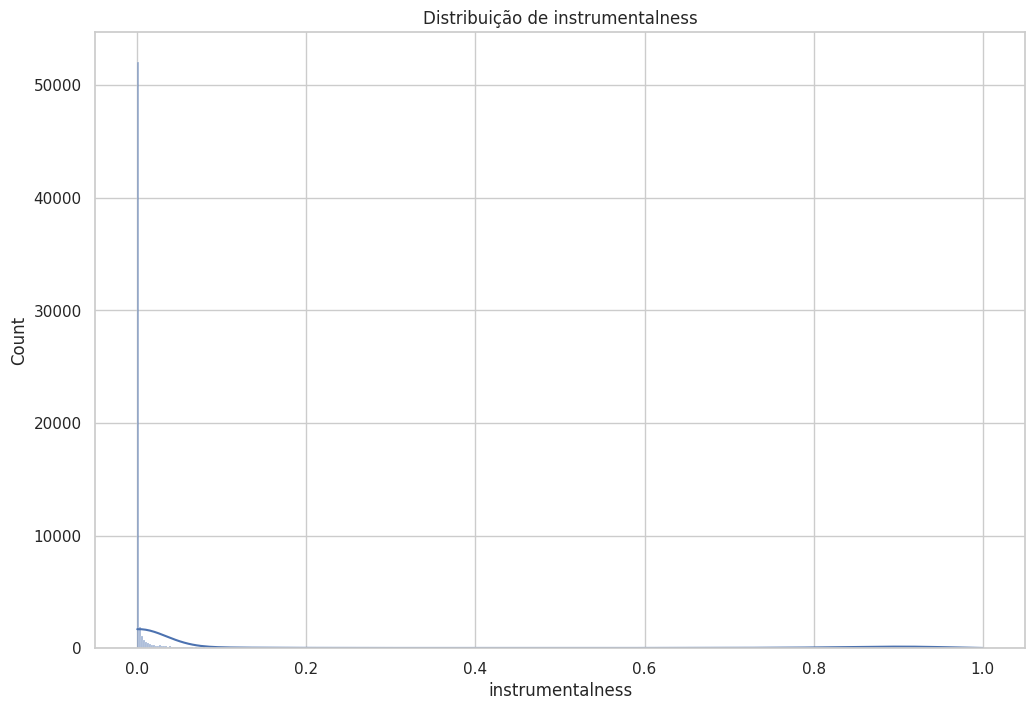

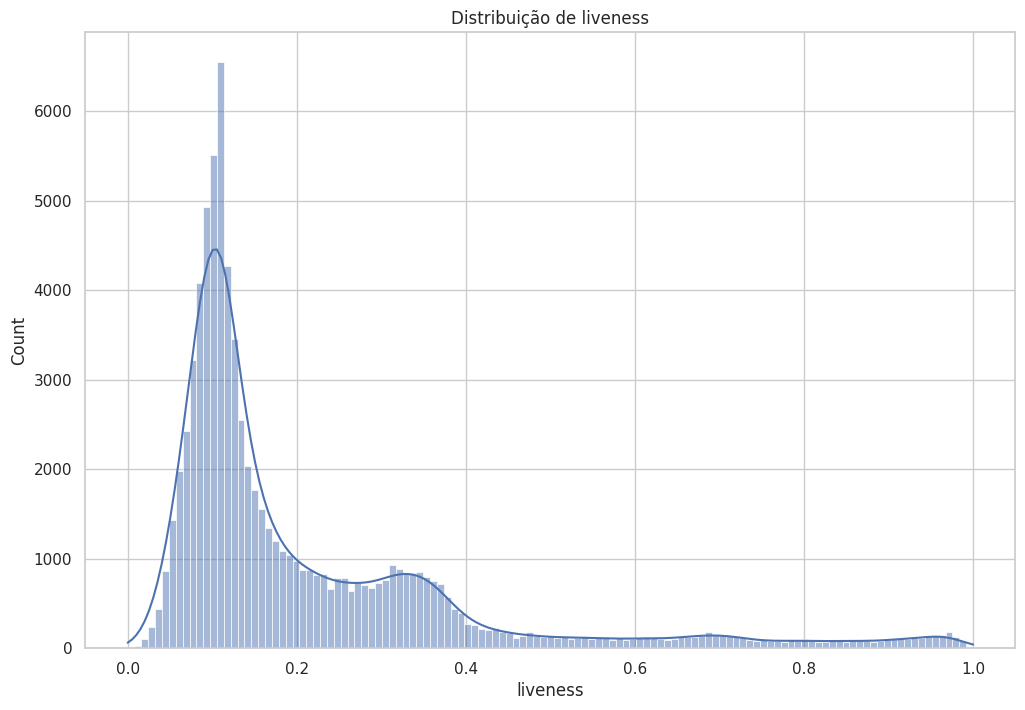

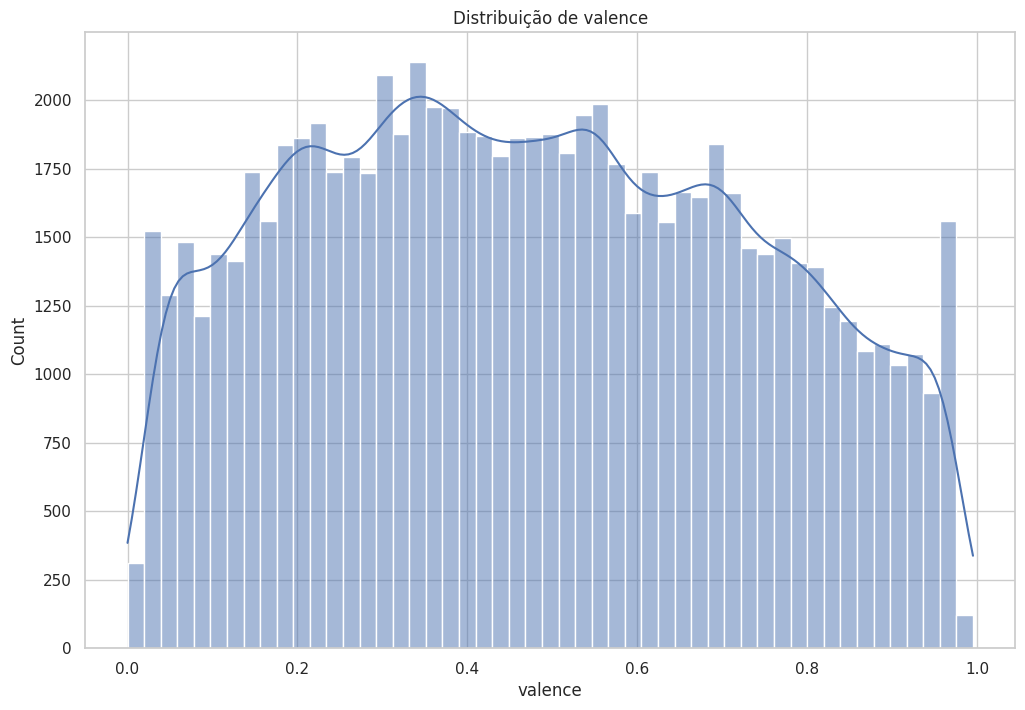

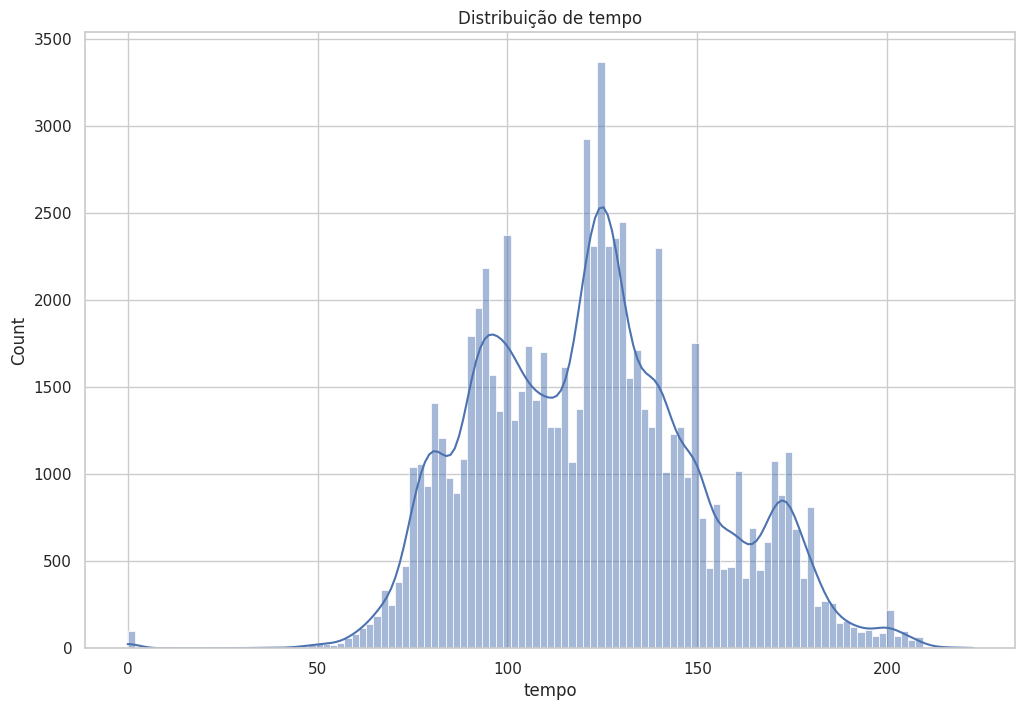

In [6]:
# Variáveis numéricas para análise
num_features = ['danceability', 'energy', 'loudness', 'speechiness',
                'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Plotando distribuições
for feature in num_features:
    plt.figure()
    sns.histplot(train[feature], kde=True)
    plt.title(f'Distribuição de {feature}')
    plt.show()

2. Relação entre Variáveis e a Popularidade

Visualizar a relação entre as variáveis numéricas e o alvo (popularity_target) usando gráficos de boxplot para verificar se existem diferenças significativas entre os grupos.

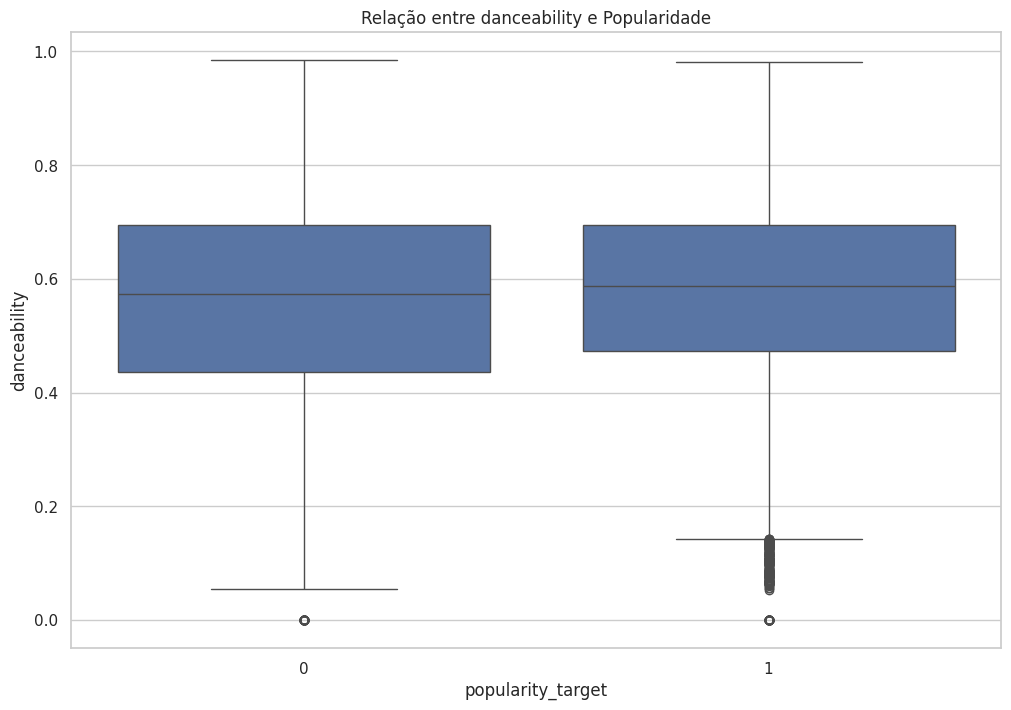

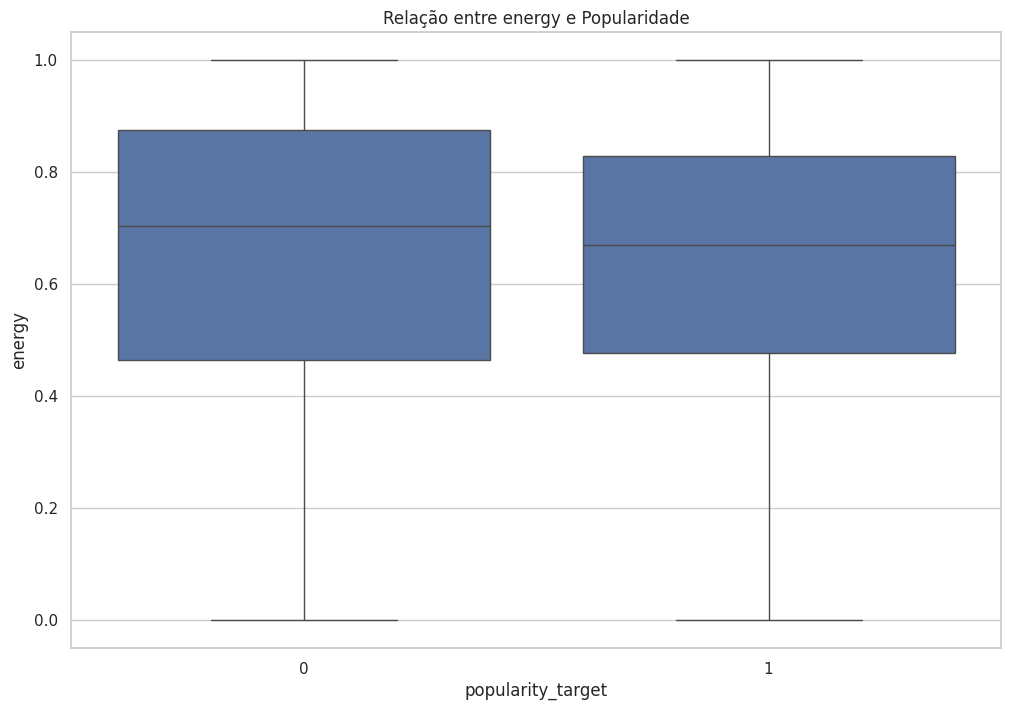

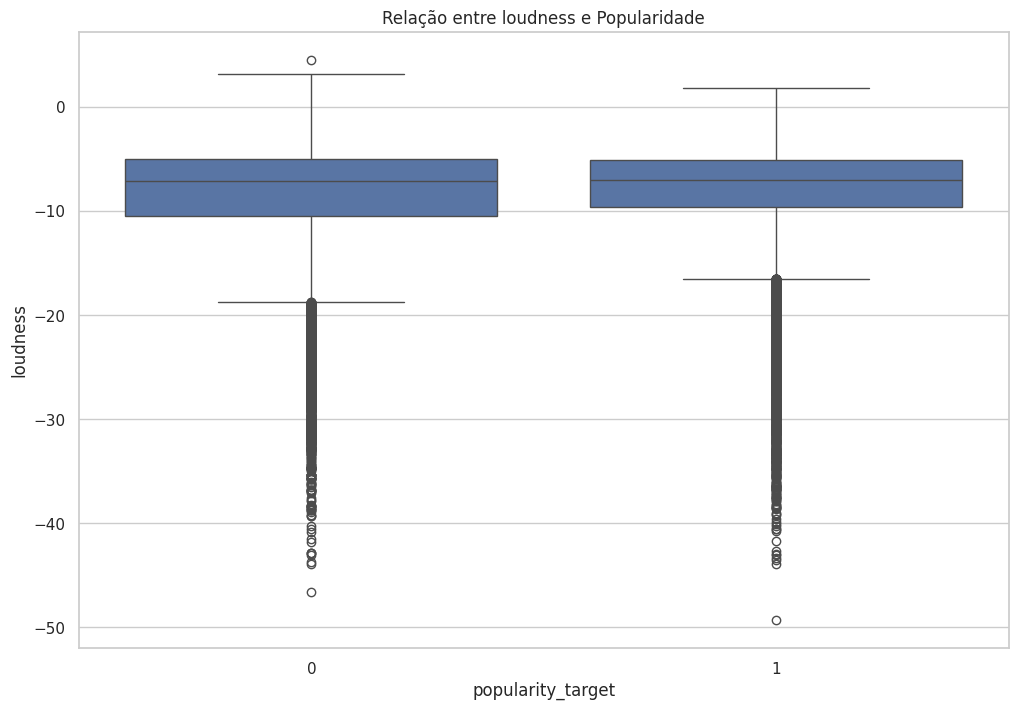

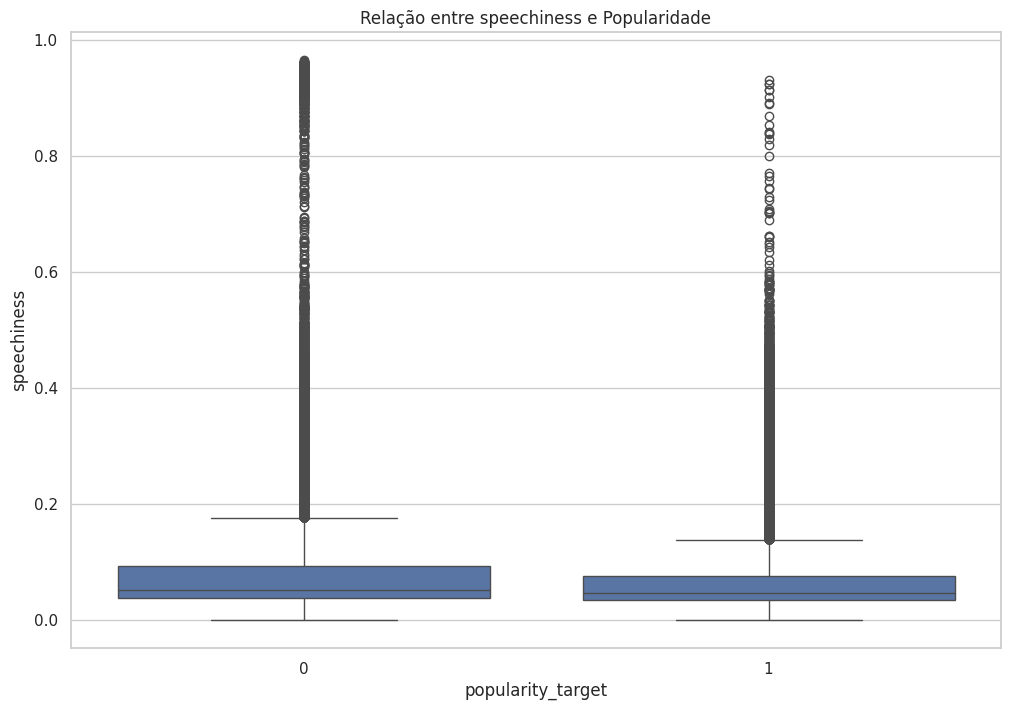

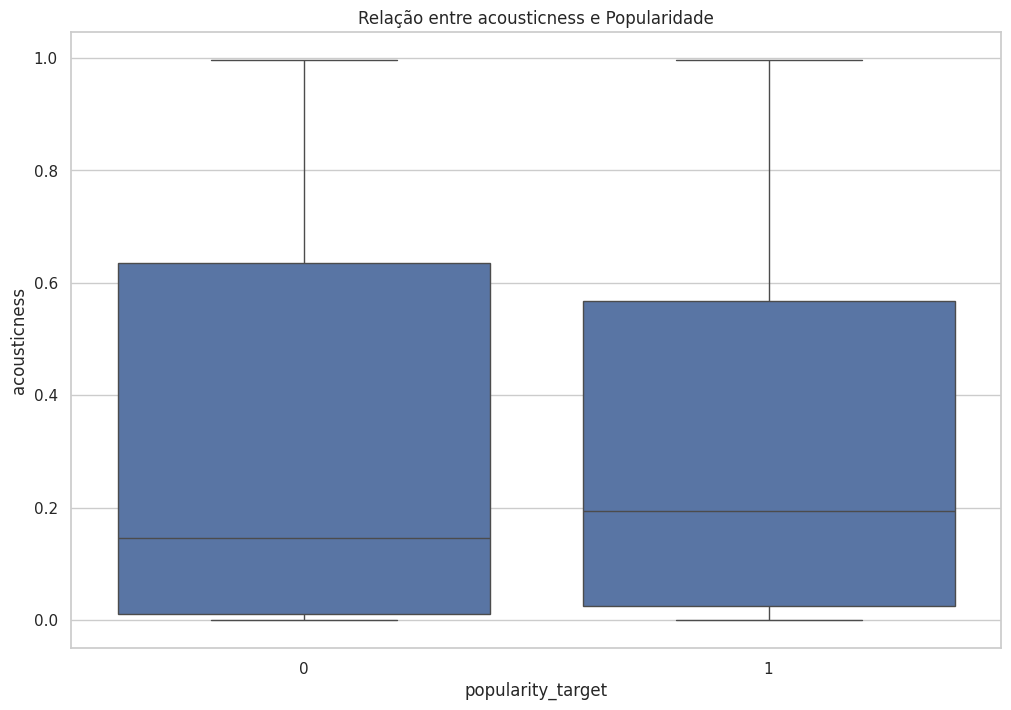

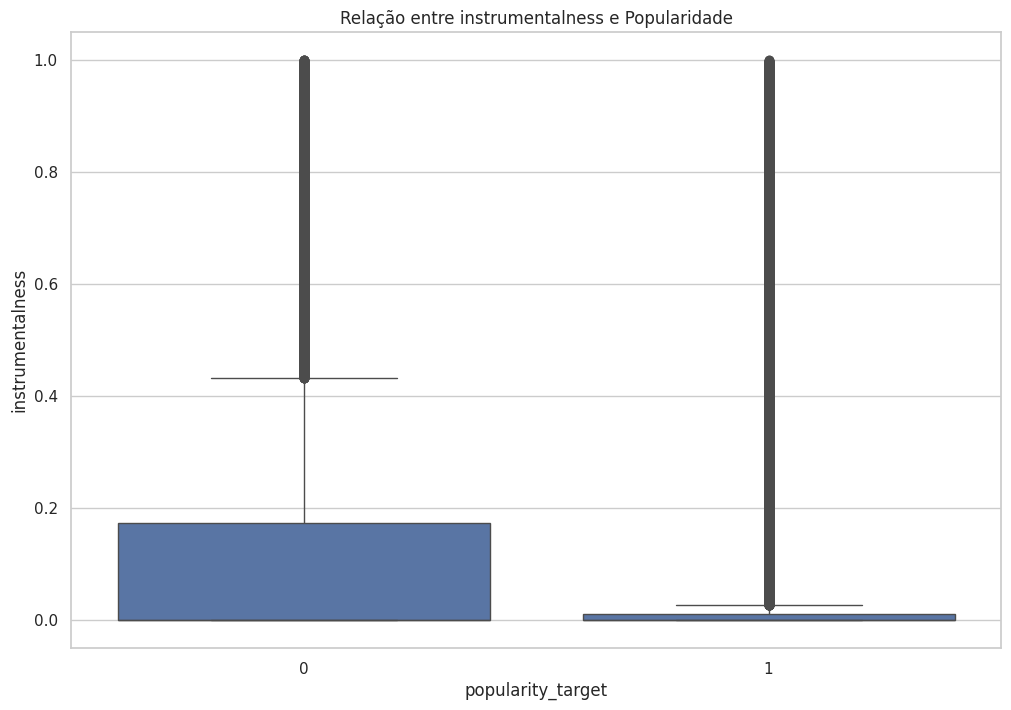

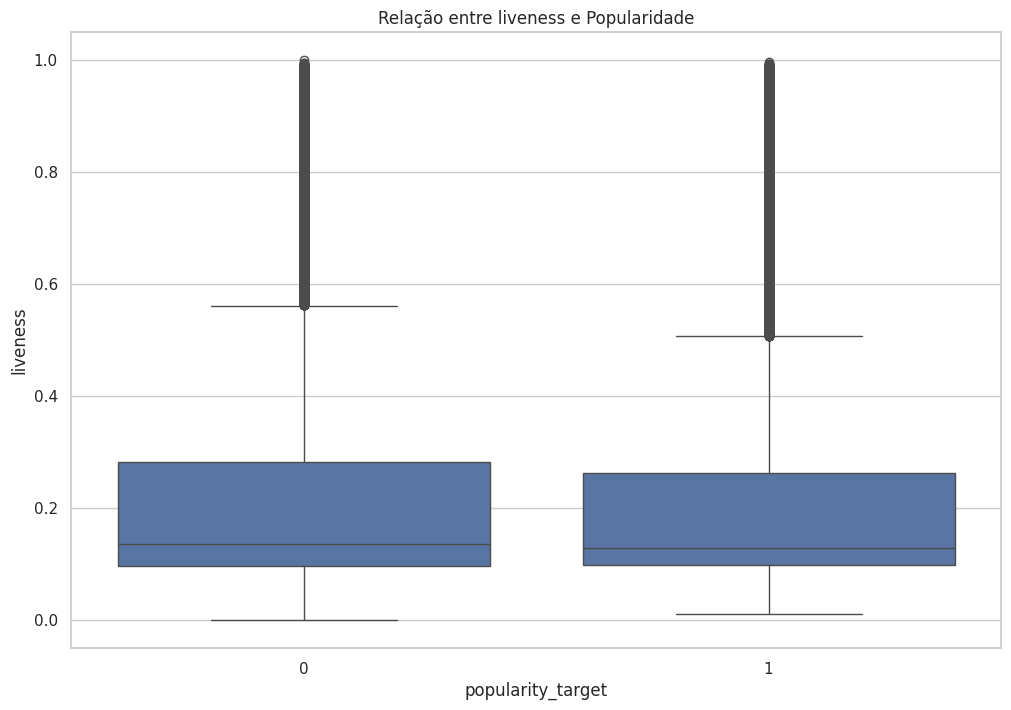

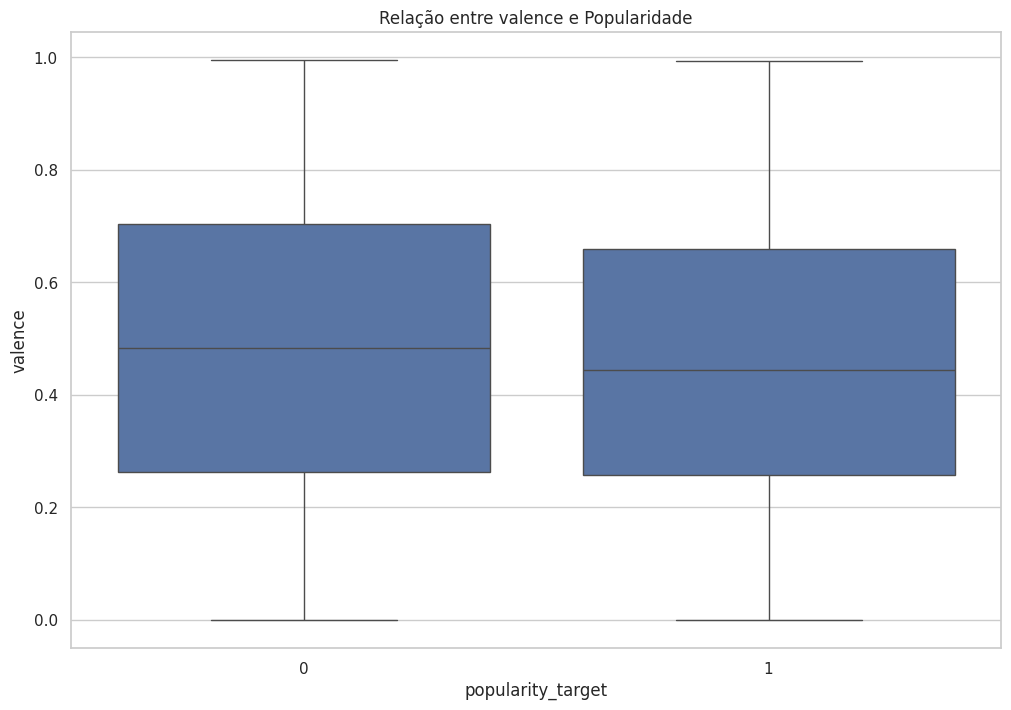

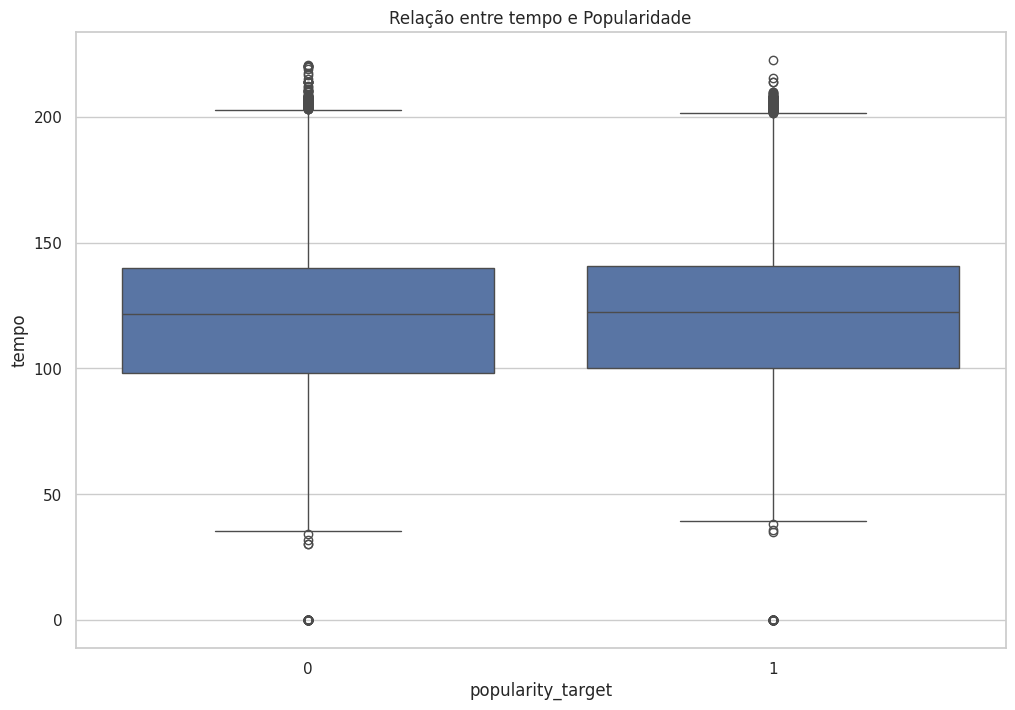

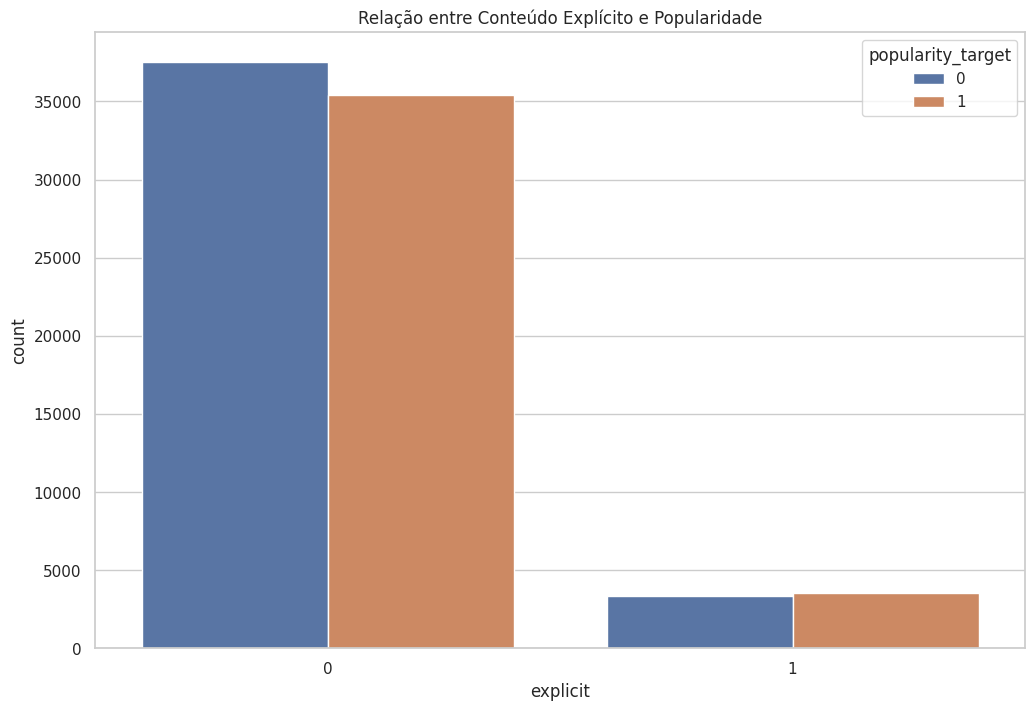

In [7]:
# Boxplot para verificar a relação entre variáveis numéricas e a popularidade
for feature in num_features:
    plt.figure()
    sns.boxplot(x='popularity_target', y=feature, data=train)
    plt.title(f'Relação entre {feature} e Popularidade')
    plt.show()

# Relação entre a variável categórica 'explicit' e a popularidade
plt.figure()
sns.countplot(x='explicit', hue='popularity_target', data=train)
plt.title('Relação entre Conteúdo Explícito e Popularidade')
plt.show()

3. Análise da Popularidade por Gênero

Visualize a popularidade de músicas por gênero.

In [8]:
# Contagem de popularidade por gênero musical
plt.figure(figsize=(12, 6))
# Check if 'track_genre' is in the DataFrame columns
if 'track_genre' in train.columns:
    sns.countplot(x='track_genre', hue='popularity_target', data=train, order=train['track_genre'].value_counts().index)
    plt.xticks(rotation=90)
    plt.title('Distribuição de Popularidade por Gênero Musical')
    plt.show()
else:
    print(f"Column 'track_genre' not found in DataFrame. Available columns: {train.columns.tolist()}")
    # If you have a different column for genre, replace 'genre_column' with the correct name
    # sns.countplot(x='genre_column', hue='popularity_target', data=train, order=train['genre_column'].value_counts().index)
    # plt.xticks(rotation=90)
    # plt.title('Distribuição de Popularidade por Gênero Musical')
    # plt.show()

Column 'track_genre' not found in DataFrame. Available columns: ['track_unique_id', 'artists', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'popularity_target', 'track_genre_afrobeat', 'track_genre_alt-rock', 'track_genre_alternative', 'track_genre_ambient', 'track_genre_anime', 'track_genre_black-metal', 'track_genre_bluegrass', 'track_genre_blues', 'track_genre_brazil', 'track_genre_breakbeat', 'track_genre_british', 'track_genre_cantopop', 'track_genre_chicago-house', 'track_genre_children', 'track_genre_chill', 'track_genre_classical', 'track_genre_club', 'track_genre_comedy', 'track_genre_country', 'track_genre_dance', 'track_genre_dancehall', 'track_genre_death-metal', 'track_genre_deep-house', 'track_genre_detroit-techno', 'track_genre_disco', 'track_genre_disney', 'track_genre_drum-and-bass', 'track_genre_dub', 'track_genre_dubstep', 'track_gen

<Figure size 1200x600 with 0 Axes>

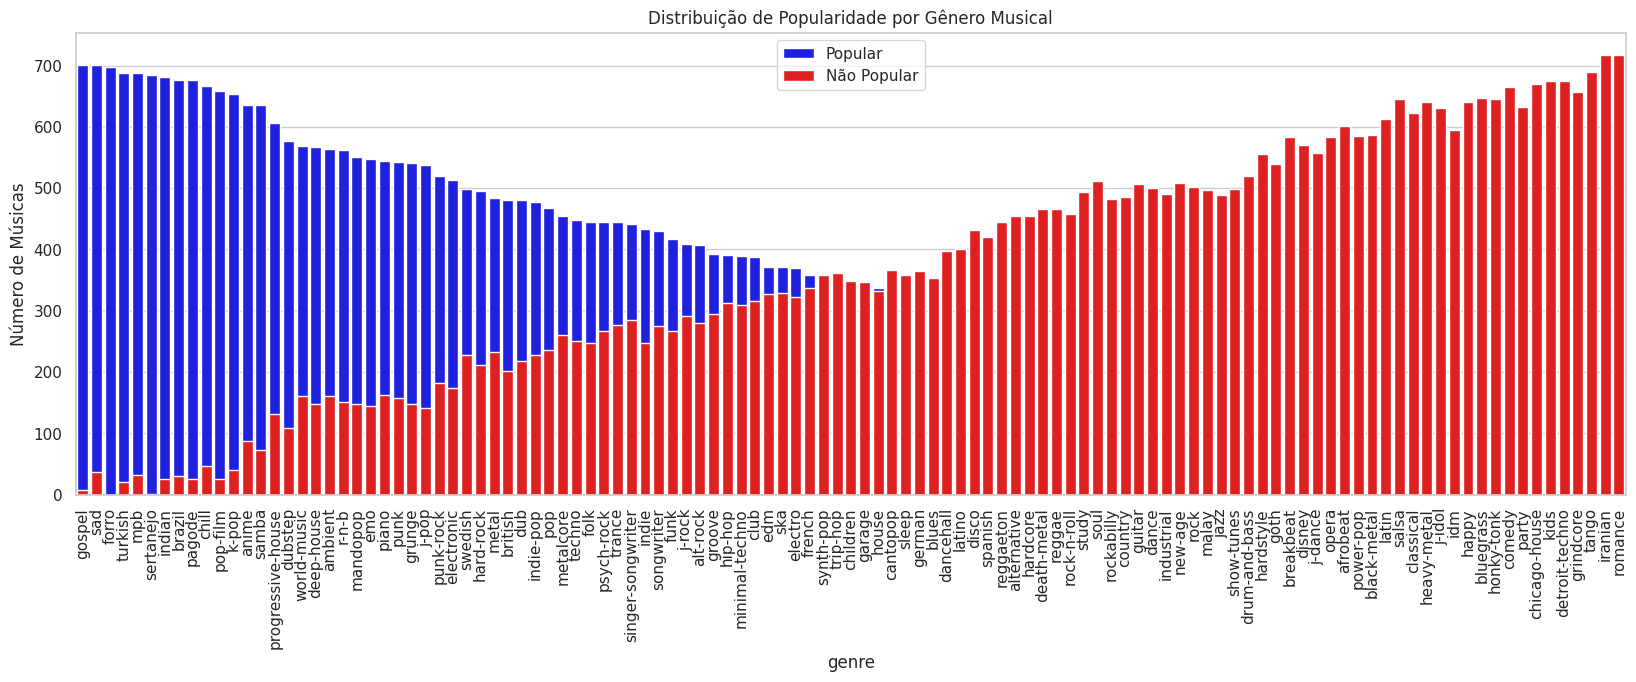

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crie uma lista de todas as colunas de gêneros dummies
genre_columns = [col for col in train.columns if col.startswith('track_genre_')]

# Criar um DataFrame temporário para acumular a popularidade por gênero
genre_popularity = pd.DataFrame(columns=['genre', 'popular', 'not_popular'])

# Iterar sobre as colunas de gêneros dummies e contar as instâncias
for genre_col in genre_columns:
    genre_name = genre_col.replace('track_genre_', '')  # Remove o prefixo
    popular_count = train[(train[genre_col] == 1) & (train['popularity_target'] == 1)].shape[0]
    not_popular_count = train[(train[genre_col] == 1) & (train['popularity_target'] == 0)].shape[0]
    # Use concat to add a new row to the DataFrame
    genre_popularity = pd.concat([genre_popularity, pd.DataFrame({'genre': [genre_name], 'popular': [popular_count], 'not_popular': [not_popular_count]})], ignore_index=True)

# Ordenar pelos gêneros mais populares
genre_popularity = genre_popularity.sort_values(by='popular', ascending=False)

# Plotar gráfico de barras empilhadas (stacked bar plot)
plt.figure(figsize=(20, 6))
sns.barplot(x='genre', y='popular', data=genre_popularity, color='blue', label='Popular')
sns.barplot(x='genre', y='not_popular', data=genre_popularity, color='red', label='Não Popular')
plt.xticks(rotation=90)
plt.title('Distribuição de Popularidade por Gênero Musical')
plt.ylabel('Número de Músicas')
plt.legend()
plt.show()

# 4. Hipóteses

**Hipótese 1: Gêneros Musicais**

Influenciam a Popularidade
Algumas categorias de gêneros musicais possuem uma maior probabilidade de gerar músicas populares, como o pop e o hip-hop, comparados a gêneros menos conhecidos ou de nicho, como a música clássica ou o jazz.

**Hipótese 2: Músicas com Maior "Energy" são Mais Populares**

Músicas que possuem uma energia mais alta (acima de 0.7 na escala do Spotify) têm maior chance de serem populares, devido ao seu apelo emocional e capacidade de manter os ouvintes engajados.

**Hipótese 3: "Danceability" Influencia a Popularidade**

Faixas com alta "danceability" tendem a ser mais populares, pois são mais adequadas para ambientes de festas, eventos e plataformas sociais, o que pode aumentar sua exposição.

# 5. Seleção de Features

Com base na análise exploratória e nas hipóteses formuladas, as seguintes features podem ser consideradas as mais relevantes para o modelo preditivo de popularidade de músicas:

### **Features Selecionadas**:

1. **Gênero da Música (`track_genre`)**:
   - **Hipótese**: Certos gêneros têm maior probabilidade de produzir músicas populares, como pop, hip-hop, e outros gêneros comerciais.
   - **Justificativa**: A análise gráfica mostra diferenças significativas entre a proporção de músicas populares e não populares em diferentes gêneros.

2. **Energia (`energy`)**:
   - **Hipótese**: Músicas com maior energia são mais propensas a serem populares.
   - **Justificativa**: A análise de boxplot sugere que músicas populares tendem a ter energia mais elevada, uma característica importante para manter o ouvinte engajado.

3. **Danceability (`danceability`)**:
   - **Hipótese**: Músicas mais "dançantes" são mais populares.
   - **Justificativa**: A distribuição de danceability indica que a maioria das músicas, tanto populares quanto não populares, têm uma pontuação de danceability moderada a alta, o que pode ser um fator crucial de sucesso.

4. **Valence (`valence`)**:
   - **Hipótese**: Músicas com uma valência (positividade) mais alta têm uma maior probabilidade de serem populares.
   - **Justificativa**: Músicas alegres e positivas tendem a ser mais atraentes para um público amplo, especialmente em plataformas como o Spotify.

5. **Acousticness (`acousticness`)**:
   - **Hipótese**: Músicas com baixa `acousticness` (ou seja, menos acústicas) são mais populares.
   - **Justificativa**: Músicas altamente processadas e eletrônicas costumam atrair uma maior audiência em comparação com músicas acústicas.

6. **Explicit (`explicit`)**:
   - **Hipótese**: Músicas com conteúdo explícito podem ter uma correlação negativa ou positiva com a popularidade, dependendo do gênero.
   - **Justificativa**: Músicas explícitas podem atrair um público específico, o que pode influenciar sua popularidade.

7. **Duração da Música (`duration_ms`)**:
   - **Hipótese**: Músicas com uma duração dentro de um certo intervalo (não muito curtas nem muito longas) tendem a ser mais populares.
   - **Justificativa**: A duração de uma música pode afetar sua aceitação, principalmente em plataformas de streaming, onde o público tende a preferir músicas de duração moderada.

8. **Speechiness (`speechiness`)**:
   - **Hipótese**: Músicas com baixa presença de falas tendem a ser mais populares.
   - **Justificativa**: Músicas com menos palavras faladas podem ser mais adequadas para um público amplo, enquanto faixas com alta `speechiness` podem estar associadas a gêneros de nicho, como podcasts ou discursos.

9. **Loudness (`loudness`)**:
   - **Hipótese**: Músicas mais altas (em decibéis) são mais populares.
   - **Justificativa**: Faixas com maior volume podem ser percebidas como mais "potentes" e envolventes para o público.

### **Exclusão de Features**:
Algumas variáveis como `track_id`, `album_name` e `track_name` podem ser excluídas, pois são identificadores ou metadados que não contribuem diretamente para a previsão de popularidade.


# 6. Construção e Avaliação do Modelo

In [10]:
!pip install --upgrade --force-reinstall scikit-learn
import sklearn
print(sklearn.__version__)


  Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 3.7 MB/s eta 0:00:00
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 16.0 MB/s eta 0:00:00
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.5.0
    Uninstalling threadpoolctl-3.5.0:
      Successfully uninstalled threadpoolctl-3.5.0
  Attempting uninstall: numpy
    Found existing 

1.5.2


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Função para carregar e preparar os dados
def load_and_prepare_data(filepath):
    df = pd.read_csv(filepath)

    # Removendo colunas irrelevantes
    df.drop(columns=['track_id', 'track_name', 'album_name'], inplace=True)

    # Selecionando um subconjunto de features
    features = ['danceability', 'energy', 'loudness', 'valence', 'explicit', 'duration_ms', 'track_genre']
    df = df[features + ['popularity_target']]

    return df

# Função para treinar o modelo e avaliar seu desempenho
def train_and_evaluate_model(df):
    # Dividindo os dados em features (X) e target (y)
    X = df.drop(columns='popularity_target')
    y = df['popularity_target']

    # Dividindo os dados em treino e teste (70% treino e 30% teste)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Criando um pré-processador com OneHotEncoder para variáveis categóricas
    categorical_features = ['track_genre']
    numeric_features = ['danceability', 'energy', 'loudness', 'valence', 'explicit', 'duration_ms']

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(), categorical_features)
        ]
    )

    # Criando um pipeline que primeiro transforma os dados e depois aplica o modelo
    rf_model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=42))
    ])

    # Treinando o modelo
    rf_model.fit(X_train, y_train)

    # Fazendo predições e avaliando o modelo
    y_pred_rf = rf_model.predict(X_test)

    # Avaliação do modelo
    rf_accuracy = accuracy_score(y_test, y_pred_rf)

    # Exibindo os resultados
    print(f"Random Forest -> Acurácia: {rf_accuracy:.2f}")
    print(classification_report(y_test, y_pred_rf))

# Carregando e preparando os dados
df = load_and_prepare_data('/content/train.csv')

# Treinando o modelo e avaliando seu desempenho
train_and_evaluate_model(df)

Random Forest -> Acurácia: 0.80
              precision    recall  f1-score   support

           0       0.80      0.82      0.81     12280
           1       0.80      0.79      0.80     11660

    accuracy                           0.80     23940
   macro avg       0.80      0.80      0.80     23940
weighted avg       0.80      0.80      0.80     23940



### Com tuning:

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Função para carregar e preparar os dados
def load_and_prepare_data(filepath):
    df = pd.read_csv(filepath)
    df.drop(columns=['track_id', 'track_name', 'album_name'], inplace=True)
    features = ['danceability', 'energy', 'loudness', 'valence', 'explicit', 'duration_ms', 'track_genre']
    df = df[features + ['popularity_target']]
    return df

# Função para treinar o modelo e avaliar seu desempenho
def train_and_evaluate_model(df):
    X = df.drop(columns='popularity_target')
    y = df['popularity_target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    categorical_features = ['track_genre']
    numeric_features = ['danceability', 'energy', 'loudness', 'valence', 'explicit', 'duration_ms']

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(), categorical_features)
        ]
    )

    # Criando o pipeline
    rf_model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=42))
    ])

    # Definindo a grade de hiperparâmetros
    param_grid = {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10]
    }

    # Configurando o GridSearch
    grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')

    # Treinando o GridSearch
    grid_search.fit(X_train, y_train)

    # Melhores parâmetros
    print(f'Melhores parâmetros: {grid_search.best_params_}')

    # Fazendo previsões e avaliando o modelo
    y_pred_rf = grid_search.predict(X_test)

    # Avaliação do modelo
    rf_accuracy = accuracy_score(y_test, y_pred_rf)
    print(f"Random Forest com Grid Search -> Acurácia: {rf_accuracy:.2f}")
    print(classification_report(y_test, y_pred_rf))

# Carregando e preparando os dados
df = load_and_prepare_data('/content/train.csv')

# Treinando o modelo e avaliando seu desempenho
train_and_evaluate_model(df)


Melhores parâmetros: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Random Forest com Grid Search -> Acurácia: 0.81
              precision    recall  f1-score   support

           0       0.81      0.82      0.81     12280
           1       0.80      0.80      0.80     11660

    accuracy                           0.81     23940
   macro avg       0.81      0.81      0.81     23940
weighted avg       0.81      0.81      0.81     23940



- **pandas**: Usado para manipulação e análise de dados, permitindo a leitura de arquivos CSV e operações em DataFrames.
- **train_test_split**: Função que divide os dados em conjuntos de treino e teste.
- **GridSearchCV**: Usado para otimização de hiperparâmetros, testando diferentes combinações de parâmetros para melhorar o desempenho do modelo.
- **RandomForestClassifier**: Um classificador de aprendizado de máquina que utiliza o algoritmo de Random Forest.
- **StandardScaler**: Para normalizar variáveis numéricas.
- **OneHotEncoder**: Para codificar variáveis categóricas em uma forma que pode ser usada pelo modelo.
- **ColumnTransformer**: Permite aplicar transformações diferentes para colunas diferentes em um DataFrame.
- **Pipeline**: Facilita a criação de um fluxo de trabalho que combina várias etapas, como pré-processamento e classificação.
- **accuracy_score** e **classification_report**: Usados para avaliar o desempenho do modelo, fornecendo métricas de acurácia e relatórios detalhados sobre a classificação.


O código utiliza as seguintes features para prever a popularidade das músicas:

- **danceability**: Mede o quão "dançante" uma música é, em uma escala de 0 a 1.
- **energy**: Representa a intensidade e atividade de uma música, variando de 0 a 1.
- **loudness**: O volume geral da música, medido em decibéis.
- **valence**: Indica a positividade musical transmitida pela faixa, também em uma escala de 0 a 1.
- **explicit**: Uma variável booleana que indica se a música contém conteúdo explícito (1) ou não (0).
- **duration_ms**: A duração da música em milissegundos.
- **track_genre**: O gênero da música, que é uma variável categórica.

Essas features são escolhidas com base em suas potenciais relações com a popularidade das músicas, permitindo que o modelo aprenda a fazer previsões precisas.


# 7. Apresentação Dos Resultados

## Melhores Hiperparâmetros
Após a execução do Grid Search, os melhores hiperparâmetros encontrados para o modelo Random Forest foram:

- **Max Depth**: None (sem limite)
- **Min Samples Split**: 2
- **Número de Estimadores**: 200

Esses parâmetros indicam que o modelo pode crescer indefinidamente em profundidade, deve realizar o split em dois samples mínimos, e utilizar 200 árvores na floresta, o que pode contribuir para uma melhor generalização do modelo.

## Desempenho do Modelo
A acurácia do modelo após a otimização foi de **81%**, indicando que o modelo conseguiu prever corretamente 81% das instâncias do conjunto de teste.

## Relatório de Classificação
O desempenho do modelo foi avaliado utilizando várias métricas de classificação, que incluem precisão, recall e f1-score:

| Classe | Precisão | Recall | F1-Score | Suporte  |
|--------|----------|--------|----------|----------|
| **0**  | 0.81     | 0.82   | 0.81     | 12,280   |
| **1**  | 0.80     | 0.80   | 0.80     | 11,660   |
| **Média** | 0.81  | 0.81   | 0.81     | 23,940   |

- **Precisão**: Indica a proporção de verdadeiros positivos entre as previsões positivas. O modelo teve uma precisão de 81% para a classe 0 e 80% para a classe 1.
- **Recall**: Refere-se à capacidade do modelo de identificar corretamente as instâncias positivas. O recall foi de 82% para a classe 0 e 80% para a classe 1.
- **F1-Score**: A média harmônica entre precisão e recall. O modelo alcançou um f1-score de 0.81 para ambas as classes, indicando um equilíbrio entre precisão e recall.

## Conclusão
O modelo Random Forest demonstrou um desempenho robusto na previsão da popularidade das músicas, alcançando uma acurácia de 81%. As métricas de precisão, recall e f1-score também refletem um desempenho equilibrado, sugerindo que o modelo é eficaz em distinguir entre as classes de popularidade.
